<a href="https://colab.research.google.com/github/it5joys135/ML-Projects/blob/main/ANN_tf_data_Live.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
from sklearn.datasets import load_breast_cancer

In [ ]:
data = load_breast_cancer()

In [ ]:
type(data)

sklearn.utils._bunch.Bunch

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [ ]:
# would any code after this change if we loaded data from csv

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33, random_state=42)

N, D = X_train.shape

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Create Tensorflow datasets
train_dataset = tf.data.Dataset.from_tensor_slices((X_train, y_train))
test_dataset = tf.data.Dataset.from_tensor_slices((X_test, y_test))

train_dataset

<_TensorSliceDataset element_spec=(TensorSpec(shape=(30,), dtype=tf.float64, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

In [ ]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(64, input_shape=(D,), activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid'),
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# train the model
batch_size = 32
# old way
# r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=15)

# New way
r = model.fit(train_dataset.batch(batch_size), validation_data=test_dataset.batch(batch_size), epochs=15)

Epoch 1/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 32ms/step - accuracy: 0.7612 - loss: 0.5434 - val_accuracy: 0.8830 - val_loss: 0.3735
Epoch 2/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8975 - loss: 0.3260 - val_accuracy: 0.9202 - val_loss: 0.2604
Epoch 3/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9328 - loss: 0.2300 - val_accuracy: 0.9309 - val_loss: 0.2028
Epoch 4/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9543 - loss: 0.1805 - val_accuracy: 0.9468 - val_loss: 0.1693
Epoch 5/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9583 - loss: 0.1517 - val_accuracy: 0.9468 - val_loss: 0.1477
Epoch 6/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9713 - loss: 0.1327 - val_accuracy: 0.9468 - val_loss: 0.1326
Epoch 7/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9672 - loss: 0.1191 - val_accuracy: 0.9574 - val_loss: 0.1215
Epoch 8/15
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9762 - loss: 0.1086 - val_accuracy: 0.9628 - val_loss

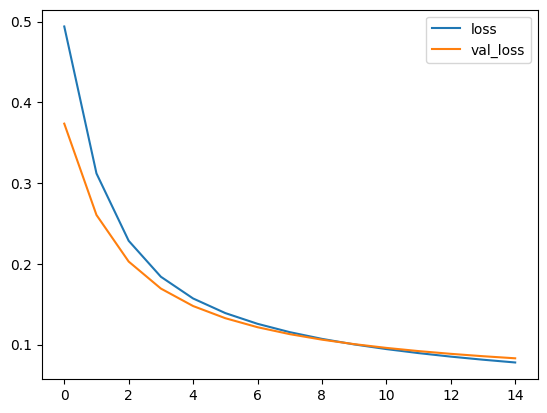

In [ ]:
# Plot loss per iteration
import matplotlib.pyplot as plt

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend();

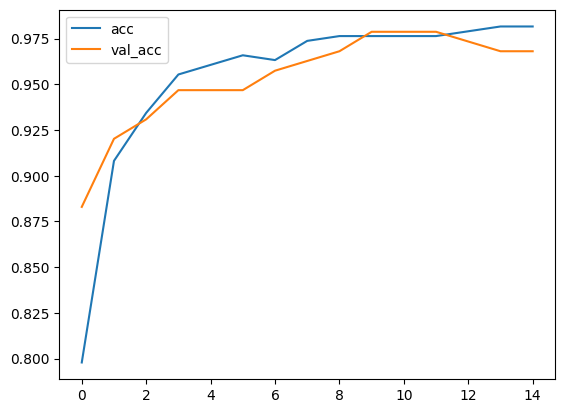

In [ ]:
# Plot accuracy per iteration
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend();

In [ ]:
# Evaluate the model
print(model.evaluate(test_dataset.batch(batch_size)))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.9593 - loss: 0.0865 
[0.08298149704933167, 0.9680851101875305]


In [ ]:
# Example usage of batch method
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6, 7, 8, 9])

# Batched elements into batch size of (3)
batch_dataset = dataset.batch(3)

for batch in batch_dataset:
  print(batch.numpy())

[1 2 3]
[4 5 6]
[7 8 9]


In [ ]:
shuffled = dataset.shuffle(buffer_size=3)
shuffled

<_ShuffleDataset element_spec=TensorSpec(shape=(), dtype=tf.int32, name=None)>

In [ ]:
batch_shuffled = shuffled.batch(3)

for batch in batch_shuffled:
  print(batch.numpy())

[3 1 2]
[5 7 6]
[4 8 9]


In [ ]:
transformed = dataset.map(lambda x: x/2)
batch_transformed = transformed.batch(3)

for batch in batch_transformed:
  print(batch.numpy())

[0.5 1.  1.5]
[2.  2.5 3. ]
[3.5 4.  4.5]
